# General Plotting

In this notebook, I load the analysis date and plot it.

## IMPORT MODULES

In [1]:
## MAKE MATPLOTLIB INLINE
%matplotlib inline

## IMPORT OS
import os

## IMPORT NUMPY
import numpy as np  # Used to do math functions

## FUNCTION TO SAVE AND LOAD PICKLE FILES
from sam_analysis.core.pickles import load_pkl

## IMPORT PLOTTING TOOLS
from sam_analysis.plotting.plots import plot_line

## SET PATHS AND LOAD DATA

In [2]:
## WORKING DIRECTORY
project_dir = r"/home/bdallin/python_projects/sam_analysis/sam_analysis"
data_dir    = "raw_data"

## DATA FILE
data_pkl = r"indus_data.pkl"

## FIGURE PATHS
manuscript_dir = r"/mnt/c/Users/bdallin/Box Sync/univ_of_wisc/manuscripts/chemically_heterogeneous_sams"
figure_dir     = r"figures"

## LOAD DATA
path_data_pkl = os.path.join( project_dir, data_dir, data_pkl )
raw_data      = load_pkl( path_data_pkl )

LOADING PKL FILE...
LOADED PKL FROM /home/bdallin/python_projects/sam_analysis/sam_analysis/raw_data/indus_data.pkl



## COMPILE DATA TO PLOT

In [3]:
## SAMS
sam_labels = [
#                ## BULK
#                "BULK-300K-TIP4P",
#                "BULK-300K-TIP4P",
#                "BULK-IDEAL",
#                "BULK-LJ",
#                ## SINGLE COMPONENTS 
               "CH3",  "NH2", "CONH2", "OH",
#                ## NH2 CHARGE SCALED
#                "CS0.0NH2", "CS0.1NH2", "CS0.2NH2", "CS0.3NH2", "CS0.4NH2", "CS0.5NH2",
#                "CS0.6NH2", "CS0.7NH2", "CS0.8NH2", "CS0.9NH2", "NH2",
#                ## CONH2 CHARGE SCALED
#                "CS0.0CONH2", "CS0.1CONH2", "CS0.2CONH2", "CS0.3CONH2", "CS0.4CONH2", "CS0.5CONH2",
#                "CS0.6CONH2", "CS0.7CONH2", "CS0.8CONH2", "CS0.9CONH2", "CONH2",
#                ## OH CHARGE SCALED
#                "CS0.0OH", "CS0.1OH", "CS0.2OH", "CS0.3OH", "CS0.4OH", "CS0.5OH",
#                "CS0.6OH", "CS0.7OH", "CS0.8OH", "CS0.9OH", "OH",
#                ## NH2 MIXED COMPOSITION
#                "CH3", "MIX25NH2", "MIX40NH2", "MIX50NH2", "MIX75NH2", "NH2",
#                ## CONH2 MIXED COMPOSITION
#                "CH3", "MIX25CONH2", "MIX40CONH2", "MIX50CONH2", "MIX75CONH2", "CONH2",
#                # OH MIXED COMPOSITION
#                "CH3", "MIX25OH", "MIX40OH", "MIX50OH", "MIX75OH", "OH",
#                ## NH2 SEPARATED COMPOSITION
#                "CH3", "SEP25NH2", "SEP40NH2", "SEP50NH2", "SEP75NH2", "NH2",
#                ## CONH2 SEPARATED COMPOSITION
#                "CH3", "SEP25CONH2", "SEP40CONH2", "SEP50CONH2", "SEP75CONH2", "CONH2",
#                # OH SEPARATED COMPOSITION
#                "CH3", "SEP25OH", "SEP40OH", "SEP50OH", "SEP75OH", "OH",
                ]

## ANALYSIS TYPES
"""
X LABELS:
"hfe_N",

Y LABELS:
"hfe_dist",
"""

## X,Y DATA LABELS
x_label    = [ "hfe_N", ]
y_label    = [ "hfe_dist", ]

## CREATE PLACEHOLDERS
labels = []
x      = []
xerr   = []
y      = []
yerr   = []

## LOOP THROUGH SAMS
for ii in range(len(x_label)):
    for ll in sam_labels:
        x_data = raw_data[ll][x_label[ii]]
        y_data = raw_data[ll][y_label[ii]]

        ## COMPUTE STATISTICS        
        xx    = x_data.mean( axis = 0 )
        xxerr = x_data.std( axis = 0 )
        yy    = -y_data.mean( axis = 0 )
        yyerr = y_data.std( axis = 0 )

        ## APPEND RESULTS
        labels.append( ll )
        x.append( xx )
        xerr.append( xxerr )
        y.append( yy )
        yerr.append( yyerr )
        


--- CREATING LINE PLOT ---
FIGURE SAVED TO: /mnt/c/Users/bdallin/Box Sync/univ_of_wisc/manuscripts/chemically_heterogeneous_sams/figures/indus_pN_distributions


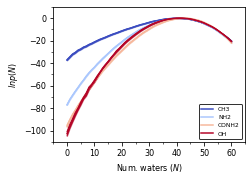

In [4]:
## FIGURE FILE
fig_name = r"indus_pN_distributions"
## FIGURE OUT PATH
fig_path = os.path.join( manuscript_dir,
                         figure_dir,
                         fig_name )
# fig_path = None

## IMPORT MATPLOTLIB
from matplotlib import cm

## CUSTOMIZE COLORBAR 
colors = [ cm.coolwarm(ii) for ii in np.linspace( 0.0, 1.0, len(y) ) ]

## PLOT LINE
plot_line( x, y,
           yerr        = yerr,
           xlabel      = r"Num. waters $(N)$",
           ylabel      = r"$ln p(N)$",
           xticks      = [ 0, 60, 10 ],
           yticks      = [ -100, 0, 20 ],
           colors      = colors,
           line_labels = labels,
           legend_cols = 1,
           fig_path    = fig_path, )
